[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xPYRL3nIuJ5u-joaljVoa2AHv7U-RiZN)

This notebook read bottom values from an Echoview `.evl` file and plots them superimposed on the corresponing sonar data.

In [22]:
# importing packages
import matplotlib.pyplot as plt
import os
import urllib.request
import dask

In [8]:
# gdown is used to download data
!pip install gdown

In [9]:
# installing echopype
!pip install -q echopype==0.7.1

In [10]:
# install echoregions package (I should fix to the current version in the repo?)
!pip install git+https://github.com/OSOceanAcoustics/echoregions

  Cloning https://github.com/OSOceanAcoustics/echoregions (to revision 45b8a80644468107f9d092e028c787e757b7dd85) to /tmp/pip-req-build-kdetocnd
  Running command git clone -q https://github.com/OSOceanAcoustics/echoregions /tmp/pip-req-build-kdetocnd
  Running command git rev-parse -q --verify 'sha^45b8a80644468107f9d092e028c787e757b7dd85'
  Running command git fetch -q https://github.com/OSOceanAcoustics/echoregions 45b8a80644468107f9d092e028c787e757b7dd85
  Running command git checkout -q 45b8a80644468107f9d092e028c787e757b7dd85


In [4]:
import echoregions as er

### Bottom Data Reading

In [6]:
# path to evl files
TEST_DATA_PATH = 'https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data'

In [7]:
# download an example file
urllib.request.urlretrieve("https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr","x1.evr")

('x1.evr', <http.client.HTTPMessage at 0x2a0603b1420>)

In [8]:
# read an example .evl file
line = er.read_evl('x1.evl')
line

#### Line as a DataFrame

`line` is a specialized object but it has a `data` attribute which is a simple dataframe.

In [9]:
# store the object's data in a dataframe
line_df = line.data

In [10]:
line_df

file_name file_type evl_file_format_version echoview_version  \
0           x1      EVBD                       3   12.0.341.42620   
1           x1      EVBD                       3   12.0.341.42620   
2           x1      EVBD                       3   12.0.341.42620   
3           x1      EVBD                       3   12.0.341.42620   
4           x1      EVBD                       3   12.0.341.42620   
...        ...       ...                     ...              ...   
7100        x1      EVBD                       3   12.0.341.42620   
7101        x1      EVBD                       3   12.0.341.42620   
7102        x1      EVBD                       3   12.0.341.42620   
7103        x1      EVBD                       3   12.0.341.42620   
7104        x1      EVBD                       3   12.0.341.42620   

                            time       depth status  
0     2017-06-25 15:04:28.137000  496.834625      1  
1     2017-06-25 15:04:28.137000  496.834625      3  
2     2017-06-25 15:04:35.895000  496.838999      3  
3     2017-06-25 15:04:35.896000  743.307494      3  
4     2017-06-25 15:40:43.910500  748.760741      3  
...                          ...         ...    ...  
7100  2017-06-26 02:19:56.994000   84.898303      3  
7101  2017-06-26 02:19:59.818000   84.860518      3  
7102  2017-06-26 02:20:02.699000   85.528454      3  
7103  2017-06-26 02:20:05.572000   85.472250      3  
7104  2017-06-26 02:20:08.443000   85.260804      0  

[7105 rows x 7 columns]

In [11]:
# status 3 are good points
line_df = line_df[line_df['status']=='3']

In [12]:
# extract only the ping_time and depth columns
bottom = line_df[['time','depth']]
bottom

time       depth
1     2017-06-25 15:04:28.137000  496.834625
2     2017-06-25 15:04:35.895000  496.838999
3     2017-06-25 15:04:35.896000  743.307494
4     2017-06-25 15:40:43.910500  748.760741
5     2017-06-25 15:40:43.911500  748.110964
...                          ...         ...
7099  2017-06-26 02:19:54.169000   85.091041
7100  2017-06-26 02:19:56.994000   84.898303
7101  2017-06-26 02:19:59.818000   84.860518
7102  2017-06-26 02:20:02.699000   85.528454
7103  2017-06-26 02:20:05.572000   85.472250

[5245 rows x 2 columns]

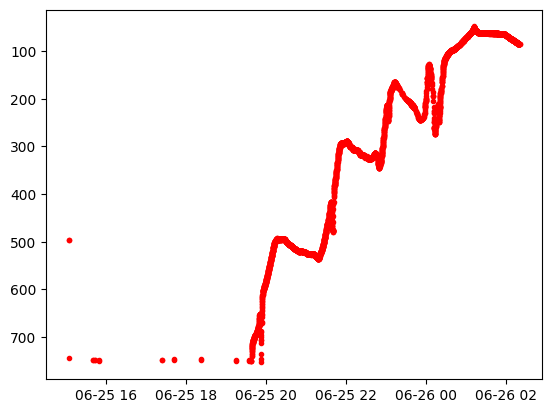

In [13]:
plt.plot(bottom['time'], bottom['depth'],'r.')
plt.gca().invert_yaxis()

### Sonar Data Reading
Here we will plot the backscatter for the set of files we have stored on Google Drive. We will just look at one frequency for simplicity.


In [14]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [15]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# SONAR_PATH_Sv = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/Sv/'
# SONAR_PATH_raw = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/raw_converted'

In [16]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S'
output = 'sample.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S
From (redirected): https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S&confirm=t&uuid=38512483-fc10-4843-b0a3-d57f97fee5af
To: c:\Users\cmtug\OneDrive\Documents\GitHub\echoregions\notebooks\sample.zip
100%|██████████| 1.67G/1.67G [06:11<00:00, 4.50MB/s]


'sample.zip'

In [17]:
# Unzip into sample folder labeled "/sample"
import zipfile
with zipfile.ZipFile("sample.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [18]:
# Paths for local read
SONAR_PATH_Sv = './sample/Sv/'
SONAR_PATH_raw = './sample/raw_converted/'

In [19]:
import xarray as xr

In [20]:
# reading the processed Sv data
ds_Sv = xr.open_mfdataset(os.path.join(SONAR_PATH_Sv, '*.nc'))

In [23]:
# reading the processed platform data
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ds_plat = xr.open_mfdataset(os.path.join(SONAR_PATH_raw, '*.nc'), group='Platform')

In [24]:
# assuming water levels are same for different frequncies and location_time
depth = ds_plat.water_level.isel(location_time=0, frequency=0, ping_time=0)+ds_Sv.range.isel(frequency=0, ping_time=0)

In [25]:
# creating a new depth dimension
ds_Sv['depth'] = depth
ds_Sv = ds_Sv.swap_dims({'range_bin': 'depth'})

### Plotting Sonar and Bottom

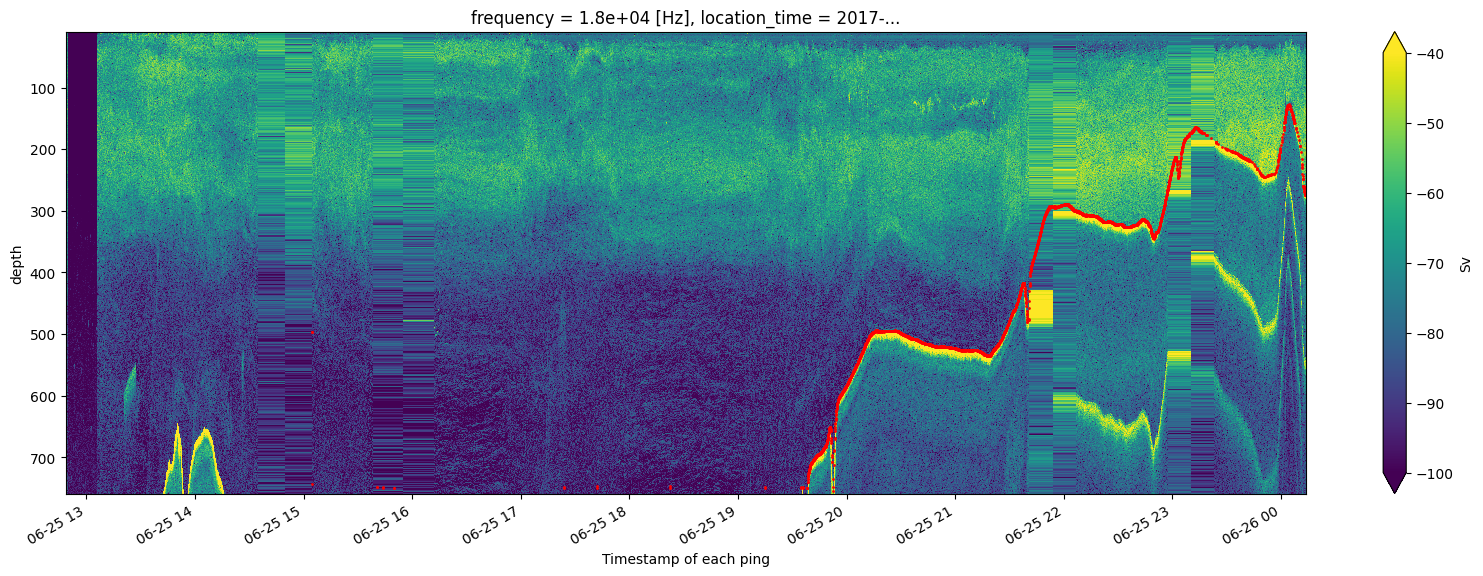

In [26]:
# plotting the sonar data and the bottom
plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
plt.plot(bottom['time'], bottom['depth'],'ro',fillstyle='full', markersize=1)

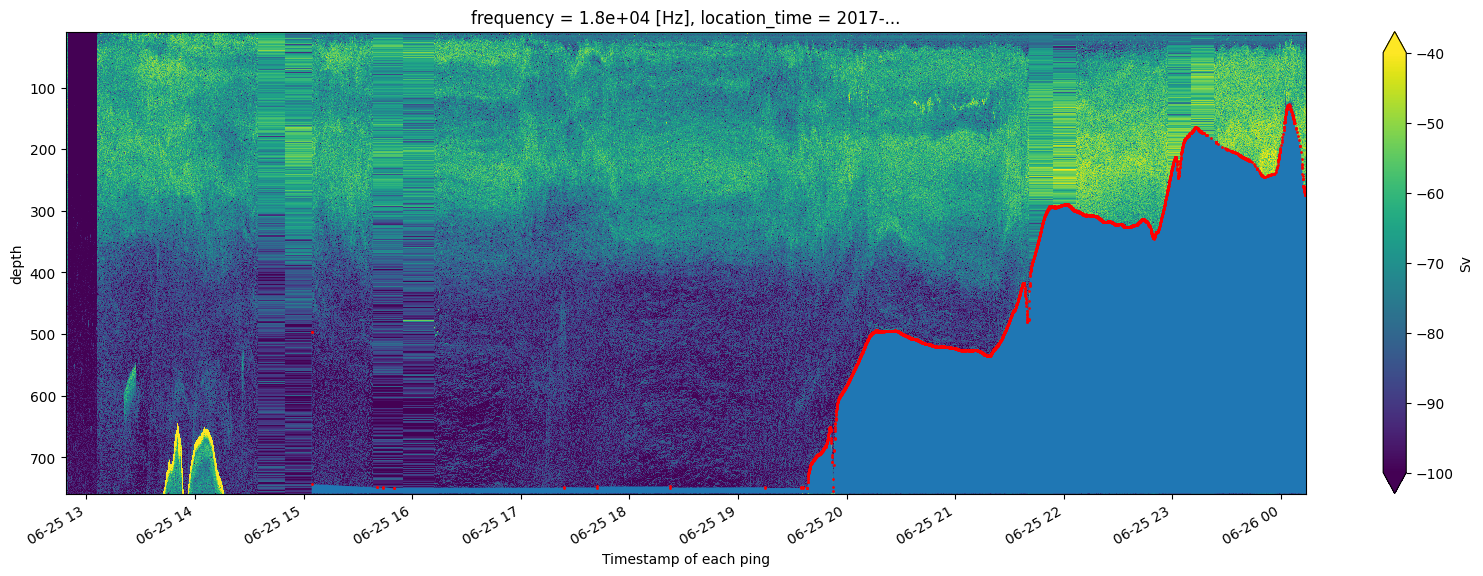

In [27]:
# plot filled bottom
plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
plt.plot(bottom['time'], bottom['depth'],'ro',fillstyle='full', markersize=1)
plt.fill_between(bottom['time'], ds_Sv.Sv.depth.max(), bottom['depth'], interpolate = False)

Note that this filling interpolates between the points which is not desirable when the bottom points are very sparse.

### Plotting with `line`'s Built-in Plotting Method

The `line` object has a built-in plotting method which can shorten the above steps.

In [28]:
help(line.plot)

Help on method plot in module echoregions.formats.lines:

plot(fmt='', start_time=None, end_time=None, fill_between=False, max_depth=0, **kwargs) method of echoregions.formats.lines.Lines instance
    Plot the points in the EVL file.
    
    Parameters
    ----------
    fmt : str, optional
        A format string such as 'bo' for blue circles.
        See matplotlib documentation for more information.
    start_time : datetime64, default ``None``
        Lower time bound.
    end_time : datetime64, default ``None``
        Upper time bound.
    fill_between : bool, default True
        Use matplotlib `fill_between` to plot the line.
        The area between the EVL points and `max_depth` will be filled in.
    max_depth : float, default 0
        The `fill_between` function will color in the area betwen the points and
        this depth value given in meters.
    alpha : float, default 0.5
        Opacity of the plot
    kwargs : keyword arguments
        Additional arguments passed 

c:\Users\cmtug\OneDrive\Documents\GitHub\echoregions\.venv\lib\site-packages\echoregions\plot\line_plot.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df.time, df.depth, fmt, **kwargs)


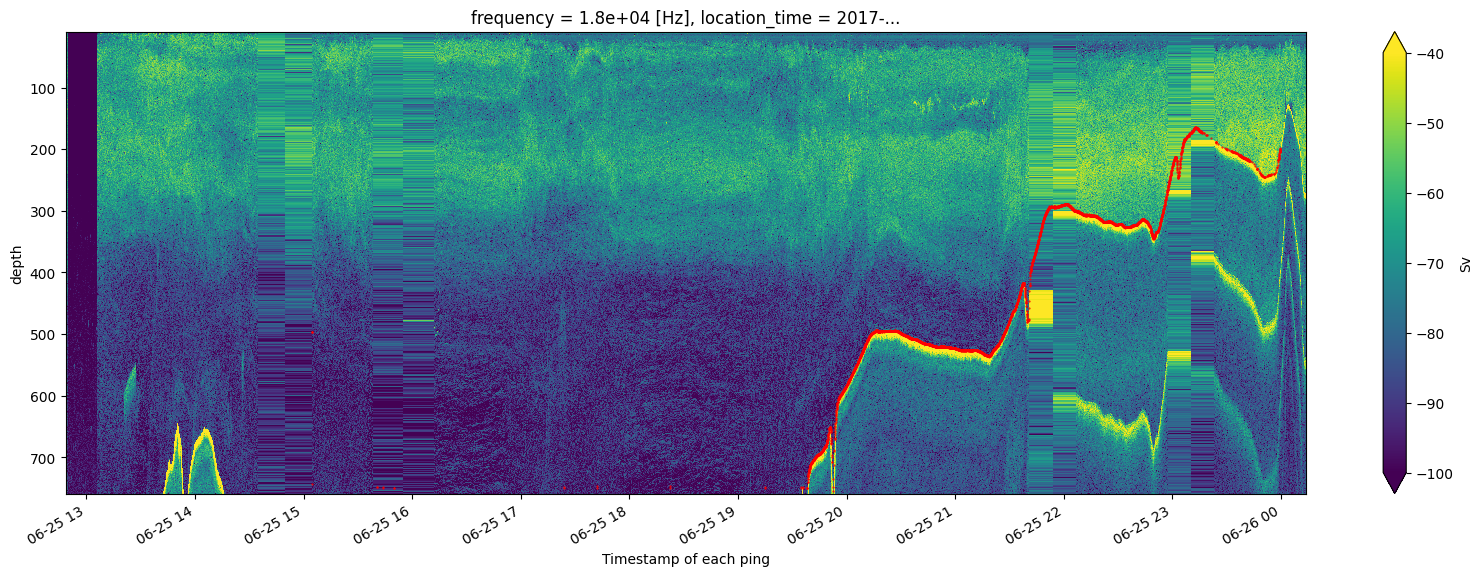

In [29]:
from datetime import datetime

# making starting and ending times
start_time = datetime(2017, 6, 25)
end_time = datetime(2017, 6, 26)

plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
line.plot(start_time=start_time, end_time=end_time, fill_between=False, linestyle='', marker='.', color='r', markersize=1)